In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from matplotlib import colors as mcolors
import torch
import random
import time
import torch.nn as nn
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torchvision import datasets, models, transforms
from sklearn.decomposition import PCA, FastICA
import itertools
import copy
import yaml
import pickle
import glob
from argparse import Namespace
%matplotlib inline
sys.path.append('../src/')
import tforms
import feature_extraction.feature_extraction_utils as futils
from feature_extraction.Network_Latents_Wrapper import NetworkLatents
# import classifier as clf


import novelty_dfm_CL.novelty_detector as novel
import novelty_dfm_CL.novelty_eval as novelval 
import novelty_dfm_CL.classifier as clf
import novelty_dfm_CL.novelty_utils as novelu


import memory as mem
import utils
import datasets as dset
import novelty_dfm_CL.datasets_holdout as dseth
import datasets_utils as dsetutils



utils.seed_torch(0)

In [2]:
dataroot = '../data/emnist/'

In [3]:
def load_emnist(root, train=True, split='letters'):

    root = os.path.expanduser(root)
    
    if train==True:
        filename = 'training_%s.pt'%split
        per_class_max=4800
    else:
        filename = 'test_%s.pt'%split
        per_class_max=800     


    data, labels = torch.load('%s/processed/%s'%(root, filename))

    


        
    data = data.type(torch.FloatTensor)
    labels = labels.type(torch.LongTensor)

    data = data/255.0
    labels = labels-1

    data = torch.stack([data,data,data], dim=1)

    data = torch.flip(data, [2])
    data = torch.rot90(data, -1, [2,3])

    # data = torch.unsqueeze(data, dim=1)


    print('data', data.shape)
    print('labels', labels.shape)


        
    return data, labels
            

In [8]:
data, labels = load_emnist(dataroot, train=True)



data torch.Size([124800, 3, 28, 28])
labels torch.Size([124800])


In [10]:
tapply = tforms.emnist_train()

tapply.__call__(data[1,...])[0,...].mean()

tensor(0.4599)

In [6]:
data[:,0,...].mean(), data[:,0,...].std()

(tensor(0.1722), tensor(0.3309))

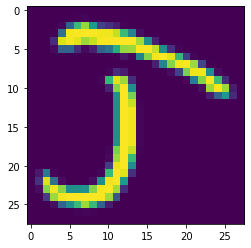

In [102]:
img = data[10,0,...]

plt.imshow(img)

In [16]:
# dataset = datasets.LSUN(dataroot, classes='train')